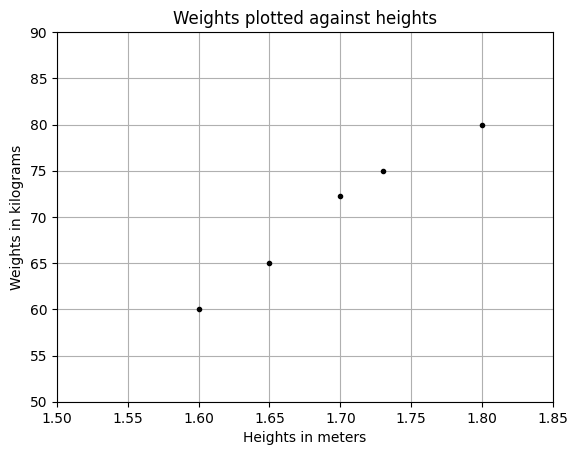

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt 

# represents the heights of a group of people in meters 
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]] 

# represents the weights of a group of people in kgs 
weights = [[60], [65], [72.3], [75], [80]] 

plt.title('Weights plotted against heights') 
plt.xlabel('Heights in meters') 
plt.ylabel('Weights in kilograms') 
plt.plot(heights, weights, 'k.') 

# axis range for x and y 
plt.axis([1.5, 1.85, 50, 90]) 
plt.grid(True) 

In [9]:
from sklearn.linear_model import LinearRegression 
# Create and fit the model 
model = LinearRegression() 
model.fit(X=heights, y=weights)

# make prediction || se desea predecir el peso de una persona de 1.75 m de altura
weight = model.predict([[1.75]])[0][0] 
print(round(weight,2)) # Según el modelo, se predice un peso de 76.04 kg

76.04


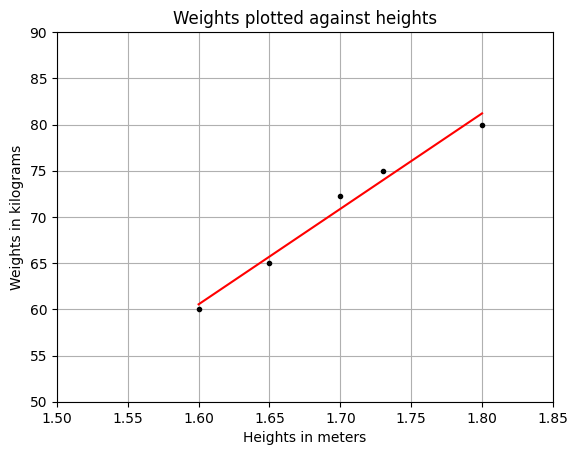

In [10]:
import matplotlib.pyplot as plt
heights = [[1.6], [1.65], [1.7], [1.73], [1.8]] 
weights = [[60], [65], [72.3], [75], [80]] 

plt.title('Weights plotted against heights') 
plt.xlabel('Heights in meters') 
plt.ylabel('Weights in kilograms') 
plt.plot(heights, weights, 'k.') 
plt.axis([1.5, 1.85, 50, 90]) 
plt.grid(True)

# plot the regression line 
plt.plot(heights, model.predict(heights), color='r')

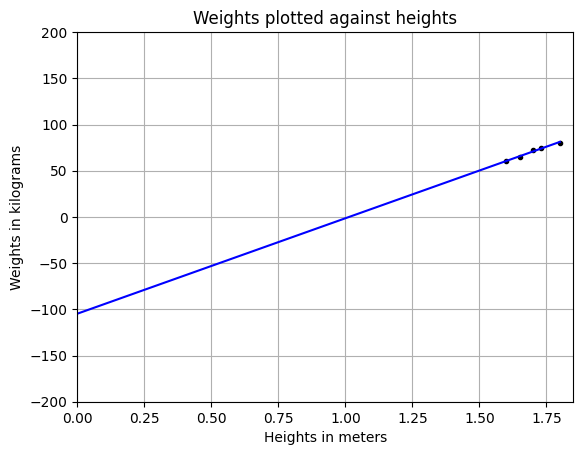

In [12]:
#AHORA SE MUESTRA EL PUNTO DONDE LA LINEA CORTA EL EJE Y

plt.title('Weights plotted against heights') 
plt.xlabel('Heights in meters') 
plt.ylabel('Weights in kilograms') 
plt.plot(heights, weights, 'k.') 
plt.axis([0, 1.85, -200, 200]) 
plt.grid(True) 

# plot the regression line 
extreme_heights = [[0], [1.8]] 
plt.plot(extreme_heights, model.predict(extreme_heights), color='b')

In [16]:
#Obtener la intersección con el eje y prediciendo el peso si la altura es 0
round(model.predict([[0]])[0][0],2) # -104.75 

#Obtener la intersección con el eje y  a través de la propiedad intercept_:
print(round(model.intercept_[0],2)) # -104.75

#Usando el objeto modelo también se puede obtener la pendiente de la línea de regresión lineal a través de la propiedad coef_:
print(round(model.coef_[0][0],2))  # 103.31

-104.75
103.31


Para determinar si la línea de regresión lineal se ajusta correctamente a todos los puntos de datos, utilizamos el método de la suma de cuadrados residuales (RSS, Residual Sum Squares).

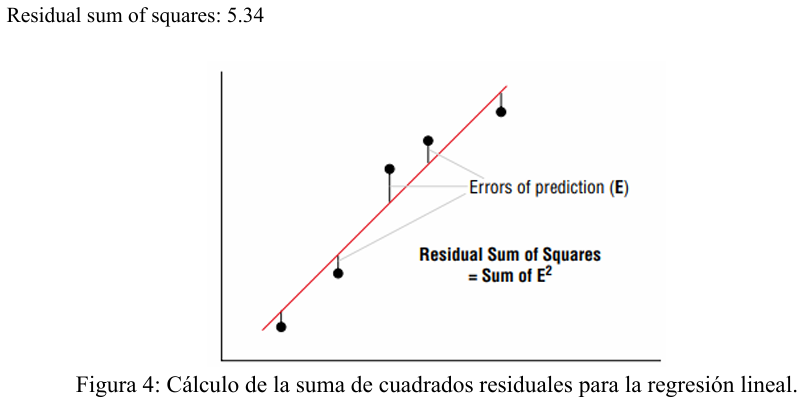

La RSS debe ser lo más pequeña posible; 0 indica que la línea de regresión se ajusta con 
precisión a los puntos (algo poco común en la práctica). De hecho, podría indicar sobreajuste según la situación.

In [21]:
#CALCULAR LA RSS

import numpy as np 
print('Residual sum of squares: %.2f' % 
np.sum((weights - model.predict(heights)) ** 2)) 

Residual sum of squares: 5.34


Podemos medir el grado de ajuste de los datos de prueba a la línea de regresión mediante el método R-cuadrado. Este método también se conoce como coeficiente de determinación o 
coeficiente de determinaciones múltiples para regresiones múltiples.
Así se calcula el R-cuadrado:

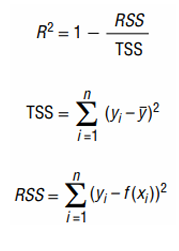

tal que

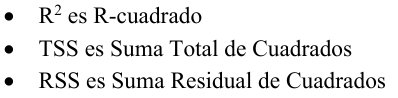

In [24]:
#Evaluación del modelo con un conjunto de datos de prueba 

#NOTA: ravel() convierte la lista bidimensional en un array contiguo aplanado (unidimensional)

# test data 
heights_test = [[1.58], [1.62], [1.69], [1.76], [1.82]] 
weights_test = [[58], [63], [72], [73], [85]]

# Total Sum of Squares (TSS) 
weights_test_mean = np.mean(np.ravel(weights_test)) 
TSS = np.sum((np.ravel(weights_test) - 
weights_test_mean) ** 2) 
print("TSS: %.2f" % TSS) 

# Residual Sum of Squares (RSS) 
RSS = np.sum((np.ravel(weights_test) - 
np.ravel(model.predict(heights_test))) 
** 2) 
print("RSS: %.2f" % RSS) 

# R_squared 
R_squared = 1 - (RSS / TSS) 
print("R-squared: %.2f" % R_squared) 

TSS: 430.80
RSS: 24.62
R-squared: 0.94


In [26]:
# CALCULAR EL R-CUADRADO DE FORMA AUTOMÁTICA USANDO Scikit-learn

print('R-squared: %.4f' % model.score(heights_test, weights_test)) # using scikit-learn to calculate r-squared 

#Un valor de R-cuadrado de 0.9429 (94.29 %) indica un ajuste bastante 
#bueno para los datos de prueba.

R-squared: 0.9429


Persistencia del modelo = guardar el modelo para su uso posterior sin necesidad de tener que volver a entrenarlo.
Hay 2 maneras de guardar un modelo entrenado en python:
1. Usar el módulo pickle estándar de Python para serializar y deserializar objetos. 
2. Usar el módulo joblib de Scikit-learn, optimizado para guardar y cargar objetos de 
Python que procesan datos de NumPy.

In [27]:
#GUARDAR EL MODELO USANDO PICKLE

import pickle 

# save the model to disk 
filename = 'HeightsAndWeights_model.sav' 

# write to the file using write and binary mode 
pickle.dump(model, open(filename, 'wb'))

In [29]:
#CARGAR EL MODELO DESDE EL ARCHIVO
# load the model from disk 
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(heights_test, weights_test) 

In [32]:
#GUARDAR EL MODELO CON joblib
from joblib import dump, load 
import joblib 

# save the model to disk 
filename = 'HeightsAndWeights_model2.sav' 
dump(model, filename) 

# load the model from disk 
loaded_model = load(filename) 
result = loaded_model.score(heights_test, weights_test) 
print(result)
filename = 'HeightsAndWeights_model2.sav' 
joblib.dump(model, filename) 

# load the model from disk 
loaded_model = joblib.load(filename) 
result = loaded_model.score(heights_test, weights_test) 
print(result)

0.9428592885995254
0.9428592885995254


**#Experimentos adicionales#**

In [53]:
#MODELO - PICKLE
import pickle 
filename = 'HeightsAndWeights_model.sav' 
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
resultPickle = loaded_model.score(heights_test, weights_test)
print(resultPickle)

#MODELO - joblib
from joblib import dump, load 
import joblib 

filename = 'HeightsAndWeights_model2.sav' 
dump(model, filename) 

loaded_model = load(filename) 
resultJob = loaded_model.score(heights_test, weights_test) 
print(resultJob)

# ---> PRUEBAS <---
#Shallow copy al modelo pickle
shallowModel = loaded_model
print(shallowModel)
print(model.fit)
print(model.fit(X=heights, y=weights))

print("#")

list_or=[shallowModel]
list_cop=list_or
print(list_or)
print(list_cop)
print("#")
list_cop.append(resultJob)
print(list_or)
print(list_cop)
print("#")

shallowModel=7

print(shallowModel)
print(loaded_model)

0.9428592885995254
0.9428592885995254
LinearRegression()
<bound method LinearRegression.fit of LinearRegression()>
LinearRegression()
#
[LinearRegression()]
[LinearRegression()]
#
[LinearRegression(), 0.9428592885995254]
[LinearRegression(), 0.9428592885995254]
#
7
LinearRegression()
